### Project categories

In [1]:
from path import Path
import fastai.vision.all as V

import data

path = Path('images')
categories = 'la-pavoni-europiccola', 'niche-zero', 'moccamaster'

### Download data

In [2]:
data.create_dataset(path, categories)
data.remove_failed_images(path)

(#0) []

### Create dataset

In [3]:
data_block = V.DataBlock(
    blocks=(V.ImageBlock, V.CategoryBlock),
    get_items=V.get_image_files,
    splitter=V.RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=V.Resize(480),  # Presizing for single interpolation on GPU
    batch_tfms=V.aug_transforms(size=224, min_scale=0.75),
    get_y=V.parent_label,
)

### Create dataloaders

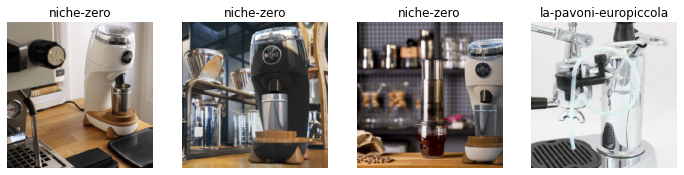

In [4]:
dls = data_block.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

### Create model using transfer learning

In [5]:
learn = V.cnn_learner(dls, V.resnet18, metrics=V.error_rate)

### Fine tune model

In [6]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.616536,3.748613,0.631579,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.852326,2.775456,0.578947,00:05
1,1.584795,2.060704,0.526316,00:04
2,1.302581,1.244275,0.421053,00:04
3,1.066535,0.626885,0.315789,00:04
4,0.888326,0.239704,0.157895,00:04
5,0.745700,0.071263,0.000000,00:04
6,0.640482,0.024943,0.000000,00:04
7,0.559205,0.010951,0.000000,00:04
8,0.493809,0.006435,0.000000,00:04
9,0.442658,0.004896,0.000000,00:04


### Confusion Matrix 

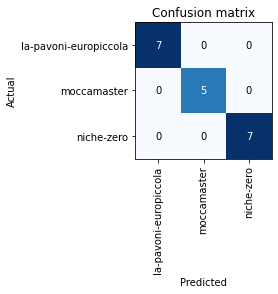

In [7]:
interp = V.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Top Losses

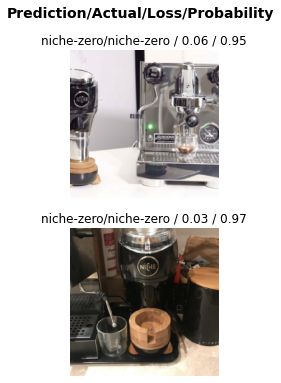

In [8]:
interp.plot_top_losses(2, nrows=2)